In [49]:
import pandas as pd
import numpy as np

In [50]:
train_path=("/kaggle/input/fake-news/train.csv")
df =pd.read_csv(train_path)

In [51]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
df.shape

(20800, 5)

In [53]:
df.duplicated().sum()

0

In [54]:
df=df.dropna()

In [55]:
X=df.drop('label',axis=1)

In [56]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [57]:
y=df['label']

In [58]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [59]:
X.shape

(18285, 4)

In [60]:
y.shape

(18285,)

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [62]:
tf.__version__

'2.15.0'

In [63]:
vocabulary=5000

In [64]:
messages=X.copy()

In [65]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [66]:
messages.reset_index(inplace=True)

In [67]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Stemming

In [68]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [69]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

# One-Hot-Encoding

In [70]:
encoded_representation=[one_hot(words,vocabulary)for words in corpus] 
encoded_representation

[[3321, 2882, 4630, 2738, 1851, 1513, 1165, 501, 4787, 3222],
 [4333, 1542, 2684, 3634, 2356, 68, 2509],
 [2854, 1551, 2258, 4004],
 [4216, 3036, 251, 3665, 880, 1908],
 [3951, 2356, 1334, 1667, 617, 3856, 2356, 4831, 2230, 2530],
 [1758,
  4780,
  4726,
  797,
  2881,
  2491,
  3214,
  3436,
  2902,
  4922,
  1994,
  4847,
  4425,
  3641,
  2509],
 [1809, 1890, 4884, 579, 4726, 229, 95, 4937, 2872, 1191, 3716],
 [4680, 446, 74, 3173, 3741, 3601, 2491, 1401, 2872, 1191, 3716],
 [1809, 448, 894, 2868, 4128, 4877, 2187, 3214, 2491, 1922],
 [2446, 1822, 839, 1134, 4263, 3727, 3845, 404],
 [833, 4060, 3700, 1255, 2098, 2647, 2303, 2610, 1117, 2211, 4158],
 [3665, 3793, 1851, 4877, 2491, 3741],
 [2820, 3327, 752, 2920, 4867, 4491, 3584, 332, 1418],
 [1141, 2583, 4074, 738, 3305, 3805, 916, 2872, 1191, 3716],
 [1608, 4968, 1828, 3127, 3490, 2872, 1191, 3716],
 [4685, 4214, 1800, 795, 3010, 2087, 2316, 4059, 3362, 3915],
 [2905, 1504, 1542],
 [2756, 2938, 4407, 2231, 2491, 3840, 1098, 2509],


# Embedding

In [71]:
max_len =20
embedded_data=pad_sequences(encoded_representation,padding='pre',maxlen=max_len)
print(embedded_data)

[[   0    0    0 ...  501 4787 3222]
 [   0    0    0 ... 2356   68 2509]
 [   0    0    0 ... 1551 2258 4004]
 ...
 [   0    0    0 ... 2872 1191 3716]
 [   0    0    0 ...  869 3594 2952]
 [   0    0    0 ... 4842 2053  834]]


In [72]:
embedded_data[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4216, 3036,  251, 3665,  880, 1908], dtype=int32)

In [73]:
embedded_vector_features=40
model=Sequential()
model.add(Embedding(vocabulary,embedded_vector_features ,input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


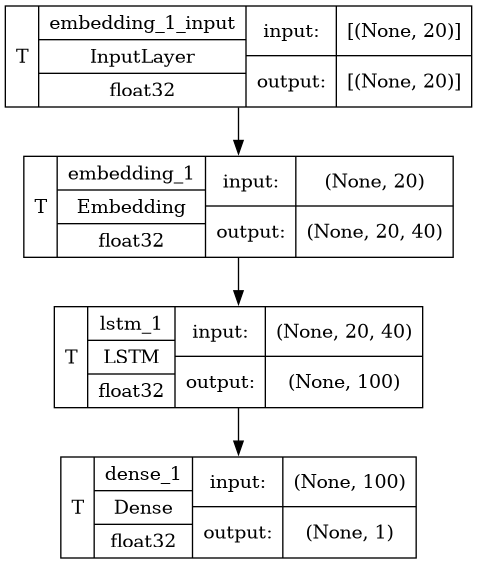

In [76]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True,show_layer_activations=False, show_trainable=True)

In [77]:
import numpy as np
X_final=np.array(embedded_data)
y_final=np.array(y)


In [78]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [80]:
X_train.shape

(12250, 20)

In [81]:
y_train.shape

(12250,)

In [82]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 37ms/step - loss: 0.3377 - accuracy: 0.8426 - val_loss: 0.1992 - val_accuracy: 0.9170
Epoch 2/10
192/192 [==============================] - 6s 33ms/step - loss: 0.1332 - accuracy: 0.9474 - val_loss: 0.2054 - val_accuracy: 0.9135
Epoch 3/10
192/192 [==============================] - 7s 35ms/step - loss: 0.0943 - accuracy: 0.9653 - val_loss: 0.2251 - val_accuracy: 0.9175
Epoch 4/10
192/192 [==============================] - 6s 34ms/step - loss: 0.0594 - accuracy: 0.9807 - val_loss: 0.3019 - val_accuracy: 0.9105
Epoch 5/10
192/192 [==============================] - 7s 34ms/step - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.3274 - val_accuracy: 0.9118
Epoch 6/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.4199 - val_accuracy: 0.9074
Epoch 7/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.4266 - val_accuracy: 0.909

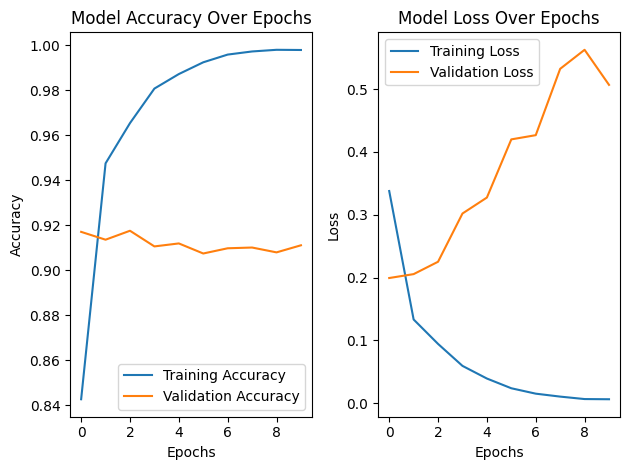

In [85]:
# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


189/189 [==============================] - 1s 7ms/step


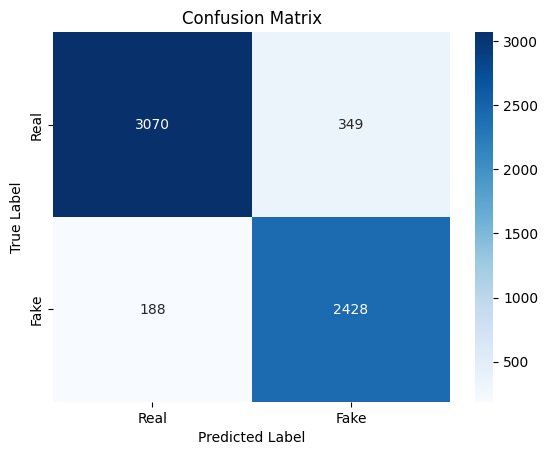

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.87      0.93      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_prob = model.predict(X_test)

y_pred = np.round(y_pred_prob).flatten()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
